<a href="https://colab.research.google.com/github/Ayushman0Singh/BikeSharingDemandPrediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Business Goal**
From a business point of view. This seems like a probelem where we need to predict the demand of rental motor cycless in order to make sure that supply is always equal to the demand. If enough motorcycles are not available on time at crowded place then the company loses out on potenial customers. Similary, If there are too many motor-cycles available at one place where there arent too many users then the company is wasting its resources at that place. Therefore, understanding and forecasting the demand is crucial to run a profitable business. 

This looks like a regression problem since we are predicting a continuos variable. Further, lets look into the data available to us, the features and EDA could help us choose an approach and give us more insights. So, lets jump into the data!



In [5]:
# importing our data handling tools
import numpy as np
import pandas as pd
import numpy as math 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [7]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = '/content/drive/MyDrive/Almabetter/Capstone Projects/Supervised ML-Regression /SeoulBikeData.csv'
df = pd.read_csv(file_path,encoding= 'unicode_escape')

# **Data Inspection**

In [109]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [103]:
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [110]:
#checking the available columns 
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [105]:
#checking for column data-type and null-values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Amazing! None the of the data points have null/missing values. The data type of these columns also seems to be correct. We are lucky to have been given such a clean a data-frame. From the first look, there is not much manipulation/cleaning required unlike most other data-sets.

**Data Description**


The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


Attribute Information:


Date : year-month-day


Rented Bike count - Count of bikes rented at each hour


Hour - Hour of he day


Temperature-Temperature in Celsius


Humidity - %


Windspeed - m/s


Visibility - 10m


Dew point temperature - Celsius


Solar radiation - MJ/m2


Rainfall - mm


Snowfall - cm


Seasons - Winter, Spring, Summer, Autumn


Holiday - Holiday/No holiday


Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

The Business Problem and the Business Metric that will be the key KPI to measure success here will be Rented Bike Count.

From the given columns we can conclude that **Rented bike count** is an appropiate measure for demand. That will be our depeandant variable in this case. We can safely say that the other columns are features of this dependant variable. Lets do some EDA to understand these features and thier relationship with the dependant variable.

The data is of one complete year, We have data from 365 days and 24 hours of each day.

# **EDA**

In [111]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The mean and median seem to be close to each other which suggest that the data is not influenced by outliers.

**Uni-variate analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


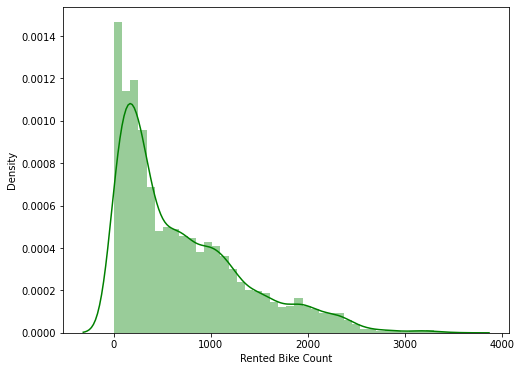

In [112]:
# distribution of the dependant variable
plt.figure(figsize=(8,6))
sns.distplot(df['Rented Bike Count'],color="g")

There many zeros in rented bike counts. This indicates that the business might be losing a lot of value in providing rental bikes when there is no demand for it. 

We can see that the data is slightly skewed to the right. Lets apply square-root to even out the distribution. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


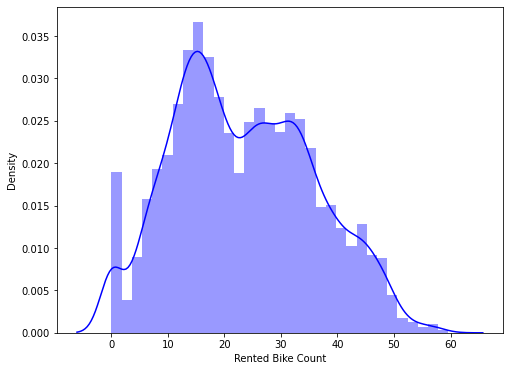

In [113]:
# Applying sqrt
plt.figure(figsize=(8,6))
sns.distplot(math.sqrt(df['Rented Bike Count']),color="b")

This transformation makes the dependent variable less skewed!

Lets have a look at each numeric variable's indivisual distribution (Univariate analysis). This will help us look at the central trend, skewness and outliers of each of these variables. 

In [24]:
# getting all the numeric columns
numeric_features = list(df.describe().columns)[2:-3]
print(numeric_features)

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [115]:
for j in numeric_features[1:0]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df[j].hist(bins=100, ax = ax)
    ax.axvline(df[j].mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(df[j].median(), color='black', linestyle='dashed', linewidth=2)    
    ax.set_title(j)
plt.show()

Applying square-root function on the features(moderately skewed data)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


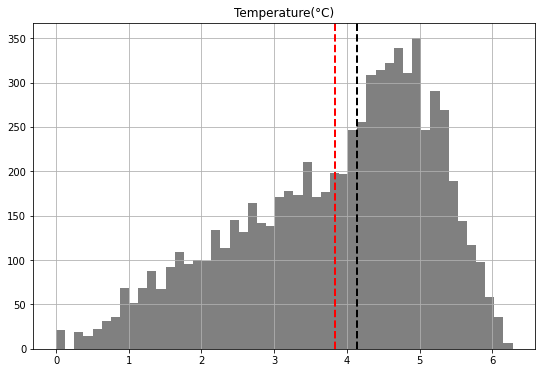

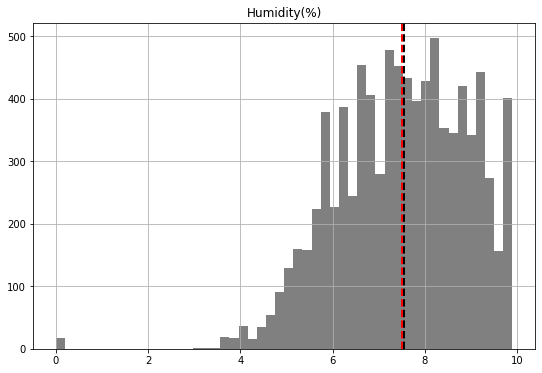

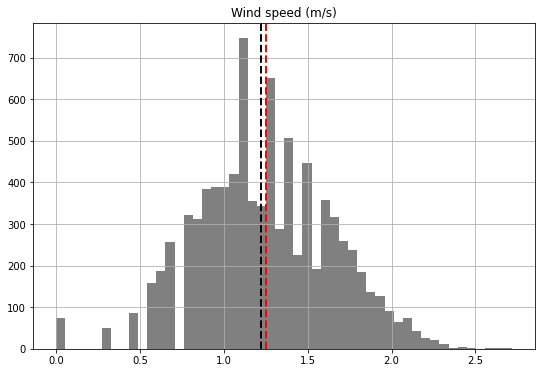

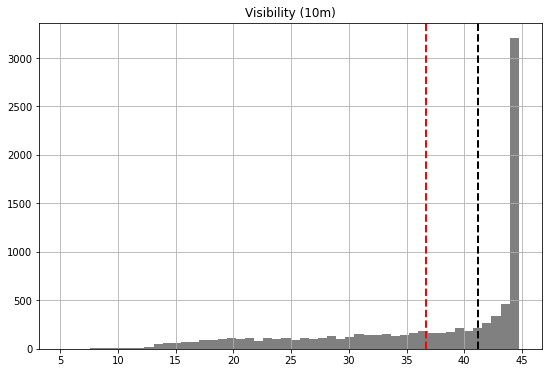

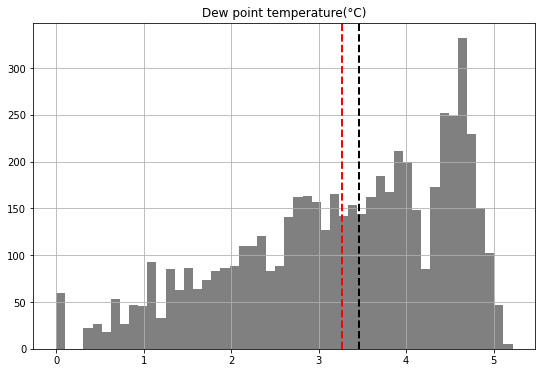

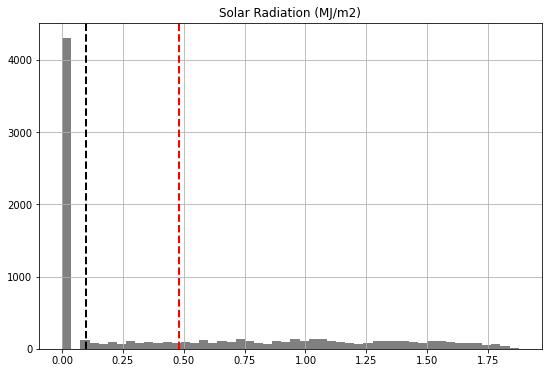

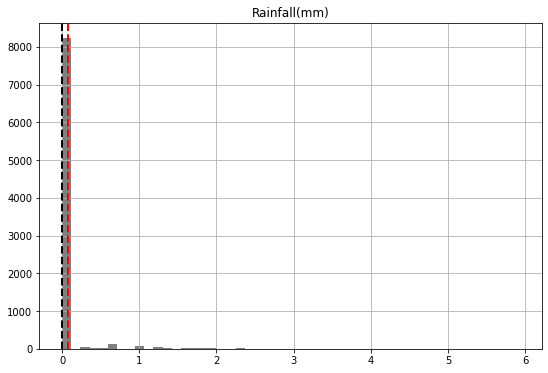

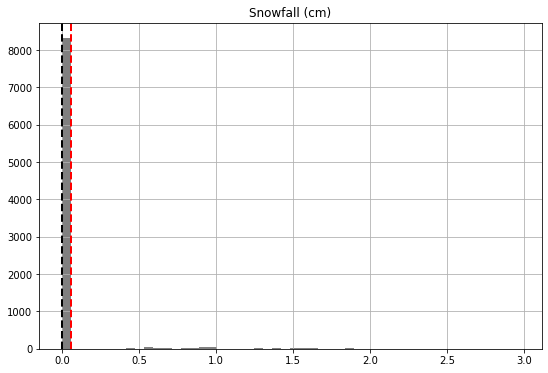

In [116]:
for j in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    math.sqrt(df[j]).hist(bins=50, ax = ax, color = 'grey')
    ax.axvline(math.sqrt(df[j]).mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(math.sqrt(df[j]).median(), color='black', linestyle='dashed', linewidth=2)    
    ax.set_title(j)
plt.show()

We can see that the affect of square-root on wind speed was the same as on the dependant variable. 


# Catagorical variables

Date is the one of the most important features here since we are trying to predict the demand at a particular date and hour. We shall **convert date to a numeric columns.**


In [9]:
#Converting date to date-month-year
import datetime
df['Year'] = pd.DatetimeIndex(df['Date']).year   #getting year column
df['Month'] = pd.DatetimeIndex(df['Date']).month  #getting month column
df['Day'] = pd.DatetimeIndex(df['Date']).day  #getting Day column
# df.drop(labels = 'Date', axis = 1, inplace = True)  # removing the date column
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
4109,21/05/2018,200,5,11.9,0,1.3,2000,-2.7,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,5,21
7412,05/10/2018,44,20,16.5,96,2.7,1047,15.8,0.00,1.0,0.0,Autumn,No Holiday,Yes,2018,5,10
5949,05/08/2018,1465,21,29.3,75,3.6,1674,24.4,0.00,0.0,0.0,Summer,No Holiday,Yes,2018,5,8
805,03/01/2018,279,13,-2.2,31,2.3,1910,-17.0,1.13,0.0,0.0,Winter,No Holiday,Yes,2018,3,1
6379,23/08/2018,582,19,30.0,59,2.2,1970,21.1,0.01,0.0,0.0,Summer,No Holiday,Yes,2018,8,23


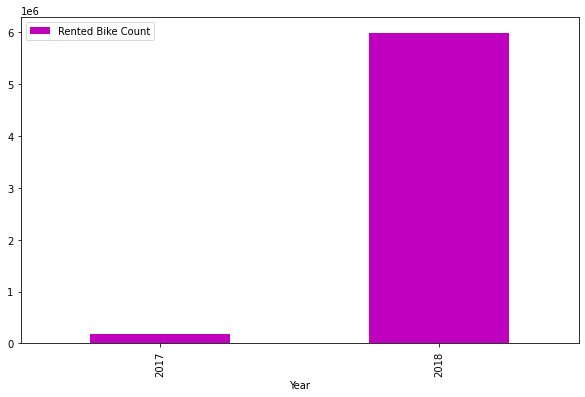

In [119]:
#ploting rented bikes according to year
year_bikecount = df.groupby(['Year'])['Rented Bike Count'].sum().reset_index()
year_bikecount.plot(x="Year", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

Only one month from 2017 is included(Dec,2017), so the sum is less. Lets take the mean to get a better understanding.

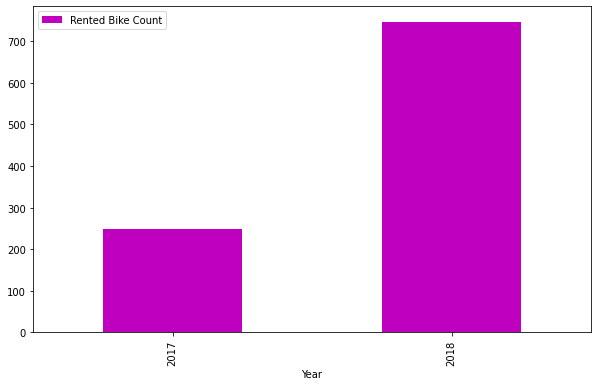

In [120]:
#ploting mean rented bikes according to year since the number of days from each year in the data might vary
year_bikecount = df.groupby(['Year'])['Rented Bike Count'].mean().reset_index()
year_bikecount.plot(x="Year", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

The demand in 2018 seem to have gone up!

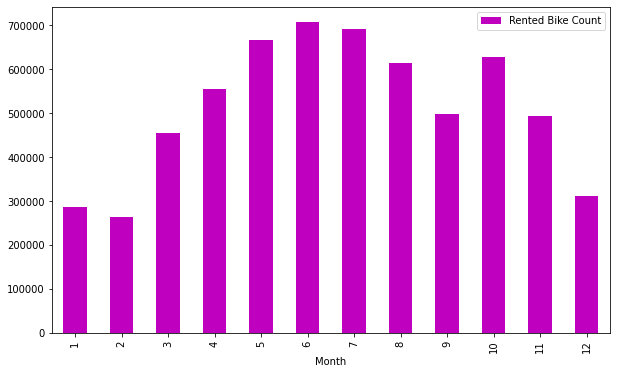

In [79]:
#ploting rented bikes according to Month
month_bikecount = df.groupby(['Month'])['Rented Bike Count'].sum().reset_index()
month_bikecount.plot(x="Month", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

The demand is highest in the months of June and July.

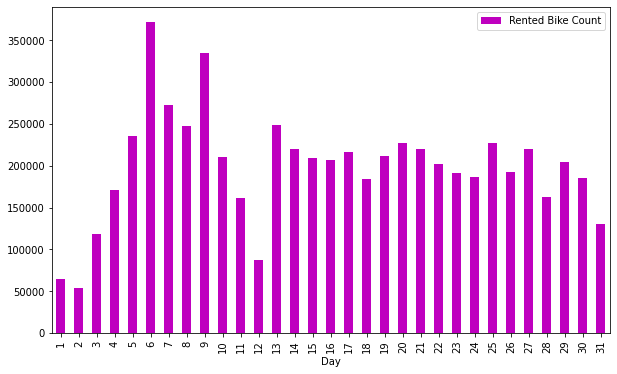

In [81]:
#ploting rented bikes according to Day
day_bikecount = df.groupby(['Day'])['Rented Bike Count'].sum().reset_index()
day_bikecount.plot(x="Day", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

Day of the month does not seem to be yeilding a particular trend, Lets convert to weekdays and try plotting the same.

Since we are checking rented bike counts, we might find a trend based on weekday. The demand for rented bikes might be higher or lower depending on what day of the week it is. 

In [36]:
#getting day of the week
df['Day_of_Week'] = pd.DatetimeIndex(df['Date']).weekday

In [37]:
def day_name_converter(p):
  days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  return days[p]

In [39]:
df['Day_of_Week1'] = df['Day_of_Week'].apply(day_name_converter)

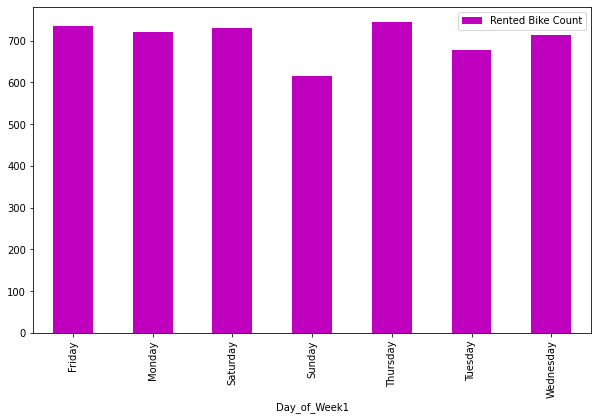

In [47]:
day_bikecount = df.groupby(['Day_of_Week1'])['Rented Bike Count'].mean().reset_index()
day_bikecount.plot(x="Day_of_Week1", y="Rented Bike Count", kind="bar", color = 'm',figsize=(10,6))

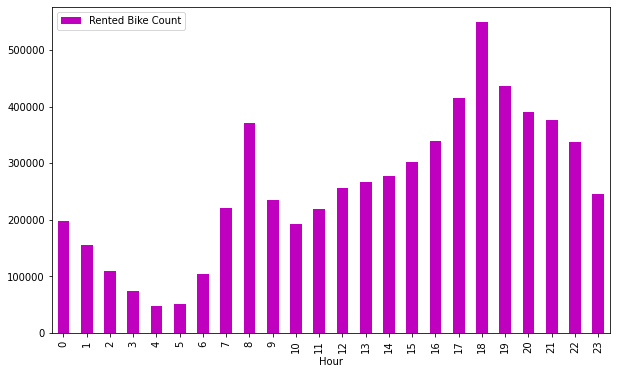

In [82]:
#ploting rented bikes according to Time of the day
Hourly_bikecount = df.groupby(['Hour'])['Rented Bike Count'].sum().reset_index()
Hourly_bikecount.plot(x="Hour", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

Hour of the day is a categorical variable. Lets group hours into different times of the day and see if there is a relationship between bikes rented and time of the day.

In [10]:
# grouping hour of the day into 6 equal bins of 4 hours 
def timeofday(x):
  if 16 <= x <= 19:
    y = 'Evening'
  elif 20 <= x <= 23:
    y = 'Night'
  elif 0 <= x <= 3:
    y = 'Late Night'
  elif 4 <= x <= 7:
    y = 'Early Morning'
  elif 8 <= x <= 11:
    y = 'Morning'
  elif 12 <= x <= 15:
    y = 'Afternoon'
  return y
df['time_of_day'] = df['Hour'].apply(timeofday)

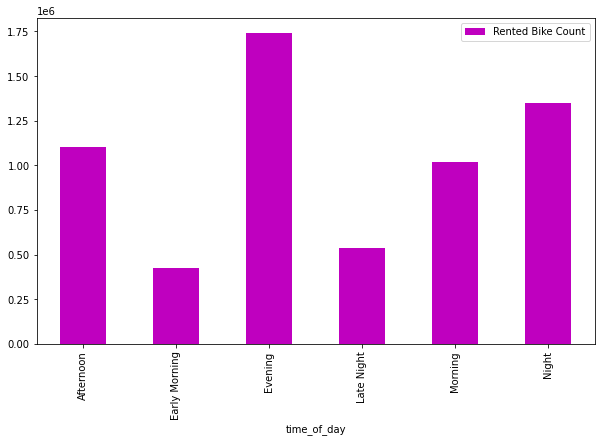

In [12]:
#ploting rented bikes according to time of the day
Seasonal_bikecount = df.groupby(['time_of_day'])['Rented Bike Count'].sum().reset_index()
Seasonal_bikecount.plot(x='time_of_day', y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

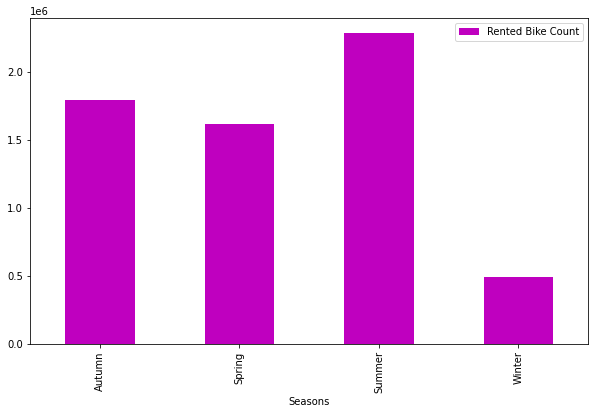

In [84]:
#ploting rented bikes according to Seasons
Seasonal_bikecount = df.groupby(['Seasons'])['Rented Bike Count'].sum().reset_index()
Seasonal_bikecount.plot(x="Seasons", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

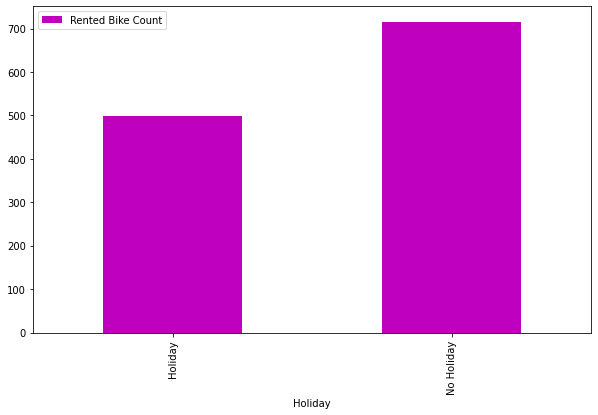

In [121]:
#ploting rented bikes mean according to Holiday
day_bikecount = df.groupby(['Holiday'])['Rented Bike Count'].mean().reset_index()
day_bikecount.plot(x="Holiday", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

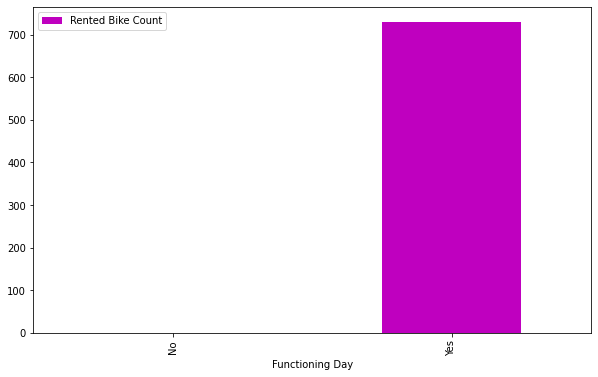

In [122]:
# ploting rented bikes mean according to Functioning day
Funct_day_bikecount = df.groupby(['Functioning Day'])['Rented Bike Count'].mean().reset_index()
Funct_day_bikecount.plot(x="Functioning Day", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

In [13]:
# Functioning day doesnt seem to be contributing anything to Rented Bike Count 
df.drop(labels = 'Functioning Day',axis=1,inplace = True)

In [14]:
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day,time_of_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Late Night
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Late Night


**Plotting the numeric features vs the dependant variable.**


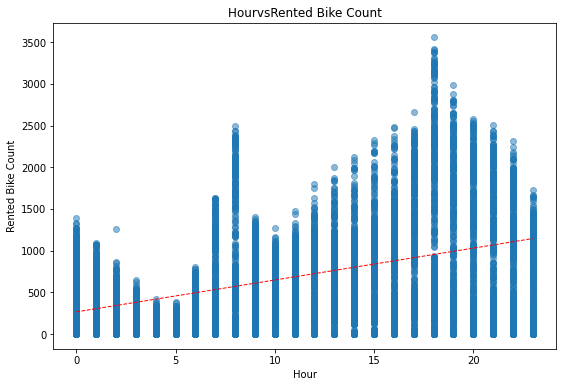

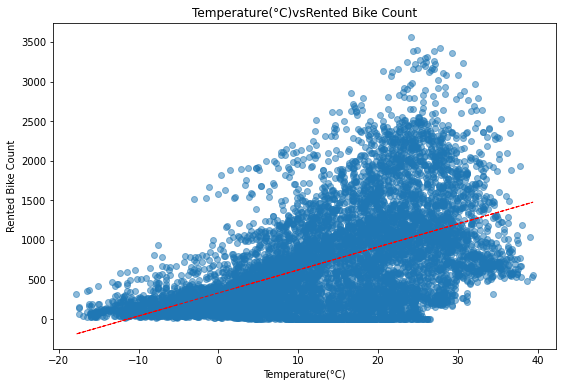

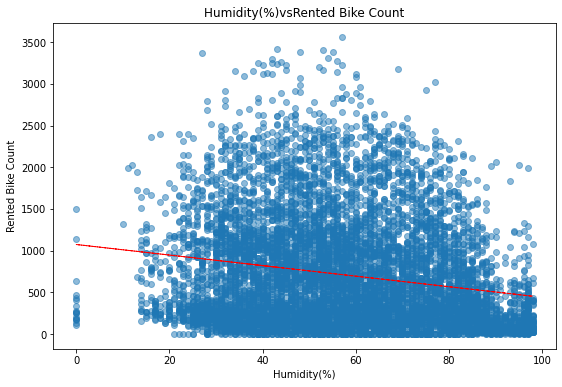

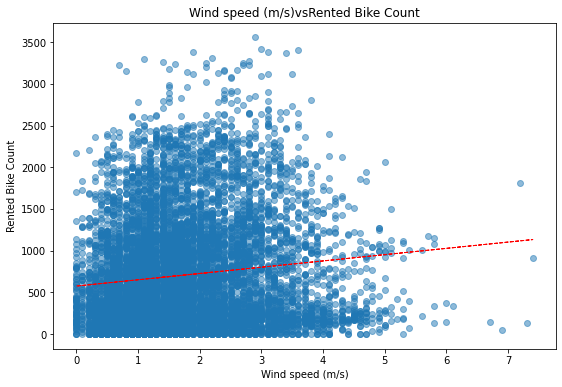

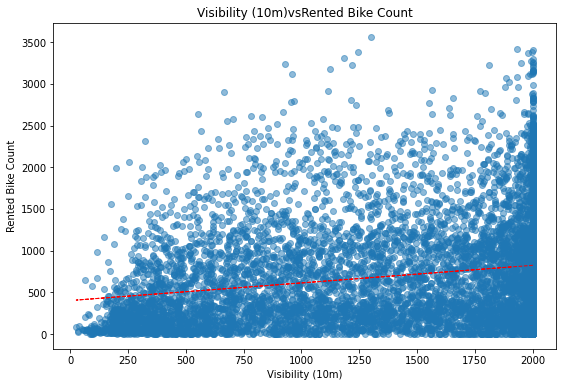

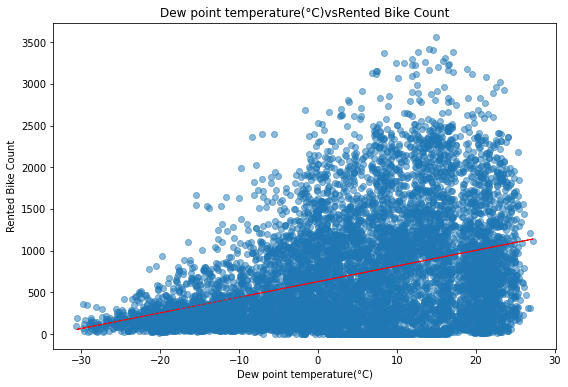

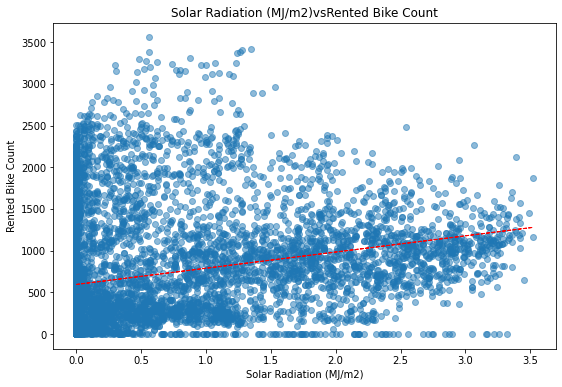

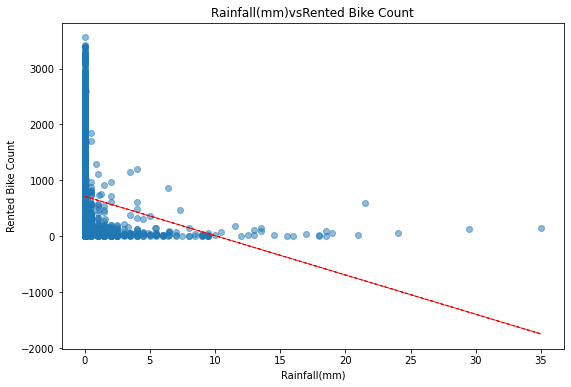

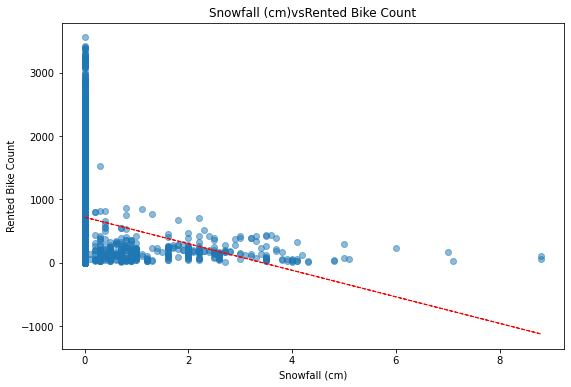

In [96]:
for i in numeric_features:
  plt.figure(figsize=(9,6))
  plt.scatter(x=df[i], y=df['Rented Bike Count'], alpha = 0.5)
  plt.xlabel(i)
  plt.ylabel('Rented Bike Count')
  plt.title( i + 'vs' 'Rented Bike Count')
  z = np.polyfit(df[i], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[i])
  plt.plot(df[i], y_hat, "r--", lw=1)
  plt.show()

None of the variables seem to be directly propotional or correlated with 'rented bike count'. Windspeed, temperature and solar radiation have somewhat of a linear relationship with the demand but its not very clear. 

**Checking for Correlation**

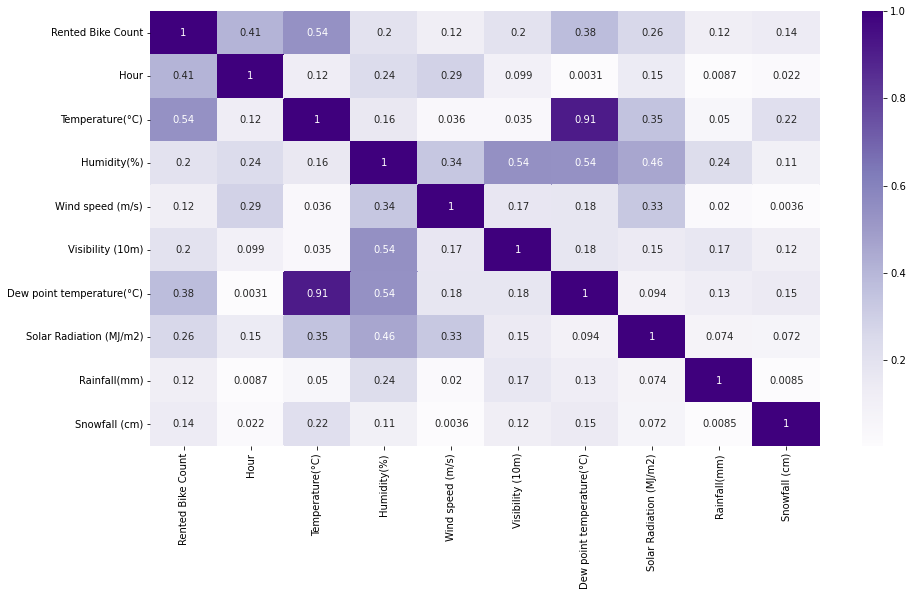

In [78]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Purples')

Temperature and Dew point temperature are highly correlated. We do not need highly correlated features in our data data-set(Lets remove one).
Lets check VIF for these variables.

In [19]:
# vif calculating function 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [58]:
# remove from the 
calc_vif(df[[i for i in numeric_features  if i not in ['Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


We chose to drop Dew point temperature(°C) since it had lower correlation with the dependent variable. All the VIF values seems appropiate now(<5). Not much multi-collinearity. 

In [48]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day,time_of_day,Day_of_Week,Day_of_Week1
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Late Night,3,Thursday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Late Night,3,Thursday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Late Night,3,Thursday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Late Night,3,Thursday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Early Morning,3,Thursday


# Data Preparation

In [84]:
#creating a copy of the data set to use 
df_pr = df.copy()

In [51]:
df_pr.shape

(8760, 19)

In [85]:
df_pr.drop(labels = ['Day_of_Week','Date','Hour','Dew point temperature(°C)','Year'] ,axis = 1,inplace = True)

In [70]:
df_pr.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,Day,time_of_day,Day_of_Week1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,1,12,Late Night,Thursday
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,1,12,Late Night,Thursday
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,1,12,Late Night,Thursday
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,1,12,Late Night,Thursday
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,1,12,Early Morning,Thursday


In [86]:
# One hot encoding
df_pr = pd.get_dummies(df_pr, columns=["Seasons", "Holiday","time_of_day","Day_of_Week1"])

In [87]:
df_pr.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,time_of_day_Afternoon,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night,Day_of_Week1_Friday,Day_of_Week1_Monday,Day_of_Week1_Saturday,Day_of_Week1_Sunday,Day_of_Week1_Thursday,Day_of_Week1_Tuesday,Day_of_Week1_Wednesday
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,12,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,12,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,1,12,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,1,12,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,1,12,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [88]:
from scipy.stats import zscore
features = list(df_pr.columns)[1:]
X = df_pr[features].apply(zscore)

In [89]:
y = math.sqrt(df_pr['Rented Bike Count'])

In [90]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 28)
(1752, 28)


# Applying models

In [91]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [93]:
reg.score(X_train, y_train)

0.535862035655994

In [94]:
reg.coef_

array([ 4.53229621e+00, -2.95423522e+00, -2.65531928e-01,  1.95211206e-01,
       -6.39554989e-01, -1.77494235e+00, -6.11441503e-02,  4.01488966e-01,
        3.17249313e-01, -1.08610580e+13, -1.09006248e+13, -1.09006248e+13,
       -1.08209093e+13, -8.88798797e+13, -8.88798797e+13,  7.02038518e+12,
        7.02038518e+12,  7.02038518e+12,  7.02038518e+12,  7.02038518e+12,
        7.02038518e+12,  2.35063656e+11,  2.33118025e+11,  2.36978756e+11,
        2.40720263e+11,  2.36978756e+11,  2.38864059e+11,  2.38864059e+11])

In [95]:
y_pred = reg.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 195011.9598838028
RMSE : 441.60158501051916


In [108]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5340467509674912
Adjusted R2 :  0.5264746726315015


Very high regression coefficients lets try L1 regularisation. 

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.860e+04, tolerance: 7.250e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.050e+04, tolerance: 7.234e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [105]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -72.31579579213553


In [106]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [109]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 195011.9598838028
RMSE : 441.60158501051916
R2 : 0.5340467509674912
Adjusted R2 :  0.5264746726315015


Trying Ridge